##### 데이터출처: http://data.go.kr
##### 출처:  https://github.com/HyunSu-Jin/seoul_crime/blob/master/seoul_crime.ipynb

##### *사용기술*
##### numpy
##### pandas
##### seaborn
##### folium
##### google api

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#df1=pd.read_csv('C:/youngyoo/seoul_crime_2015.csv',encoding='cp949') #or euc-kr
#df1

In [18]:
df=pd.read_csv('C:/youngyoo/seoul_crime_2015.csv',encoding='euc-kr') #or euc-kr
#df.head(3)
#df.tail(3)
#df.shape
#df.info()
#df.describe()
df

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704"
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227"
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519"
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


In [ ]:
#각 경찰서별 발생한 볌죄(발생),범죄(검거)의 추가적인 column
#    -소계(발생) = 각 범죄 발생 합
#    -소계(검거) = 각 범죄 검거 합

#살인(발생) 살인(검거) 강도(발생) 강도(검거) 강간(발생) 강간(검거) 절도(발생) 절도(검거) 폭력(발생) 폭력(검거)

In [24]:
#df['소계(발생)'] = df['살인(발생)']+df['강도(발생)']+df['강간(발생)']+df['절도(발생)']+df['폭력(발생)']

In [25]:
#모든 데이터를 정수 형태로 (text -> int)
#콤마 값이 없어져야함

for tuple in df.values:
    for ele in tuple[-1:4:-1]:
        str(ele).replace(',','')
textData = df[df.columns[-4:]].values

for idx,row in enumerate(textData):
    for idx2,ele in enumerate(row):
        textData[idx][idx2] = int(str(ele).replace(',',''))
textData
df[df.columns[-4:]] = textData
df.head(3)

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794


In [30]:
df.values[0]

array(['중부서', 2, 2, 3, 2, 105, 65, 1395, 477, 1355, 1170], dtype=object)

In [32]:
df['소계(발생)'] = df['살인(발생)']+df['강도(발생)']+df['강간(발생)']+df['절도(발생)']+df['폭력(발생)']

In [33]:
df['소계(검거)'] = df['살인(검거)']+df['강도(검거)']+df['강간(검거)']+df['절도(검거)']+df['폭력(검거)']

In [34]:
df

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860,1716
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472,1589
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094,1226
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029,2579
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233,1354
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,3820,2483
6,성북서,2,2,2,1,86,71,953,409,1194,1015,2237,1498
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,4720,3205
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,5854,3597
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,6867,4154


In [35]:
policeToArea = {'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}

In [36]:
df['구별']=df['관서명'].apply(lambda v:policeToArea.get(v,v))
df.sort_values(by='구별').head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거),구별
30,수서서,10,7,6,6,149,124,1439,666,1819,1559,3423,2362,강남구
17,강남서,3,3,15,12,300,225,2411,984,2465,2146,5194,3370,강남구
20,강동서,4,3,6,8,156,123,2366,789,2712,2248,5244,3171,강동구
14,강북서,7,8,14,13,153,126,1434,618,2649,2348,4257,3113,강북구
19,강서서,7,8,13,13,262,191,2096,1260,3207,2718,5585,4190,강서구


In [37]:
df_by_gu = pd.pivot_table(df, index='구별', aggfunc=np.sum)
df_by_gu.head()

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298


In [38]:
df_by_gu['강간검거율'] = df_by_gu['강간(검거)']/df_by_gu['강간(발생)']*100
df_by_gu['강도검거율'] = df_by_gu['강도(검거)']/df_by_gu['강도(발생)']*100
df_by_gu['살인검거율'] = df_by_gu['살인(검거)']/df_by_gu['살인(발생)']*100
df_by_gu['절도검거율'] = df_by_gu['절도(검거)']/df_by_gu['절도(발생)']*100
df_by_gu['폭력검거율'] = df_by_gu['폭력(검거)']/df_by_gu['폭력(발생)']*100
df_by_gu['검거율'] = df_by_gu['소계(검거)']/df_by_gu['소계(발생)']*100

#del frame_by_gu['강간(검거)']
#del frame_by_gu['강도(검거)']
#del frame_by_gu['살인(검거)']
#del frame_by_gu['절도(검거)']
#del frame_by_gu['폭력(검거)']

In [39]:
df_by_gu

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157,58.502758
광진구,220,240,26,14,4,4,3707,5909,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619,62.734811
구로구,164,281,11,15,6,8,3502,5646,889,2335,2432,3007,58.362989,73.333333,75.000000,38.072805,80.877951,62.026213
금천구,122,151,6,6,4,3,2796,3781,888,1567,1776,2054,80.794702,100.000000,133.333333,56.668794,86.465433,73.948691
노원구,121,197,7,7,10,10,3268,5130,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665,63.703704


In [40]:
df_by_gu[df_by_gu[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100] = 100
df_by_gu.head(10)

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758
광진구,220,240,26,14,4,4,3707,5909,1277,3026,2180,2625,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811
구로구,164,281,11,15,6,8,3502,5646,889,2335,2432,3007,58.362989,73.333333,75.000000,38.072805,80.877951,62.026213
금천구,122,151,6,6,4,3,2796,3781,888,1567,1776,2054,80.794702,100.000000,100.000000,56.668794,86.465433,73.948691
노원구,121,197,7,7,10,10,3268,5130,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665,63.703704


In [41]:
df_by_gu.rename(columns = {'강간(발생)':'강간', 
                       '강도(발생)':'강도', 
                       '살인(발생)':'살인', 
                       '절도(발생)':'절도', 
                       '폭력(발생)':'폭력'}, inplace=True)
#del frame_by_gu['소계(발생)']
del df_by_gu['소계(검거)']

df_by_gu.head()

,강간(검거),강간,강도(검거),강도,살인(검거),살인,소계(발생),절도(검거),절도,폭력(검거),폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,8617,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,123,156,8,6,3,4,5244,789,2366,2248,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,126,153,13,14,8,7,4257,618,1434,2348,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
강서구,191,262,13,13,8,7,5585,1260,2096,2718,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381
관악구,221,320,14,12,8,9,6345,827,2706,2642,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758


In [43]:
popuation = pd.read_csv('C:/youngyoo/seoul_population.csv',index_col='구별') #-> 파일 구축할 때 따라서 인코딩 필요할 수도 안할수도
popuation.head()

,인구수
구별,
강남구,581760
강동구,463321
강북구,334426
강서구,595691
관악구,529031


In [45]:
df_by_gu = df_by_gu.join(popuation)
df_by_gu.head()

,강간(검거),강간,강도(검거),강도,살인(검거),살인,소계(발생),절도(검거),절도,폭력(검거),폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,8617,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760
강동구,123,156,8,6,3,4,5244,789,2366,2248,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321
강북구,126,153,13,14,8,7,4257,618,1434,2348,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,334426
강서구,191,262,13,13,8,7,5585,1260,2096,2718,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381,595691
관악구,221,320,14,12,8,9,6345,827,2706,2642,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,529031


In [48]:
#최대 검거율을 보이는 지역 Best 5

df_by_gu.sort_values(by='검거율',ascending=False).head(5)

,강간(검거),강간,강도(검거),강도,살인(검거),살인,소계(발생),절도(검거),절도,폭력(검거),폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,,,,,,
강서구,191,262,13,13,8,7,5585,1260,2096,2718,3207,72.900763,100.000000,100.0,60.114504,84.752105,75.022381,595691
금천구,122,151,6,6,4,3,3781,888,1567,1776,2054,80.794702,100.000000,100.0,56.668794,86.465433,73.948691,256167
강북구,126,153,13,14,8,7,4257,618,1434,2348,2649,82.352941,92.857143,100.0,43.096234,88.637222,73.126615,334426
도봉구,106,102,10,9,3,3,2664,478,1063,1303,1487,100.000000,100.000000,100.0,44.967074,87.626093,71.321321,353241
동대문구,146,173,13,13,5,5,4720,814,1981,2227,2548,84.393064,100.000000,100.0,41.090358,87.401884,67.902542,373824


In [49]:
#인구수 대비 범죄 발생율 ( 소계(발생) per 인구수 ) Best 5

df_by_gu['범죄/인구수'] = df_by_gu['소계(발생)'] / df_by_gu['인구수']
df_by_gu.sort_values(by='범죄/인구수',ascending=False).head()

,강간(검거),강간,강도(검거),강도,살인(검거),살인,소계(발생),절도(검거),절도,폭력(검거),폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수,범죄/인구수
구별,,,,,,,,,,,,,,,,,,,
중구,111,170,6,9,2,3,4954,859,2548,1964,2224,65.294118,66.666667,66.666667,33.712716,88.309353,59.386354,134329,0.036880
종로구,161,211,9,11,5,6,4705,837,2184,1931,2293,76.303318,81.818182,83.333333,38.324176,84.212822,62.550478,163822,0.028720
영등포구,183,295,20,22,12,14,6867,978,2964,2961,3572,62.033898,90.909091,85.714286,32.995951,82.894737,60.492209,417811,0.016436
광진구,220,240,26,14,4,4,5909,1277,3026,2180,2625,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811,375180,0.015750
용산구,173,194,14,14,5,5,3820,587,1557,1704,2050,89.175258,100.000000,100.000000,37.700706,83.121951,65.000000,247909,0.015409


In [50]:
#데이터 시각화
#Normalization  -> 표준화 => 칼럼끼리 비교 용이하게
target_col = ['강간', '강도', '살인', '절도', '폭력','소계(발생)']
max_column = df_by_gu[target_col].max() # vector
min_column = df_by_gu[target_col].min()
crime_count_norm = (df_by_gu[target_col] - min_column)/max_column
crime_count_norm.sort_values(by='소계(발생)',ascending=False).head()

,강간,강도,살인,절도,폭력,소계(발생)
구별,,,,,,
강남구,0.772829,0.727273,0.785714,0.723896,0.652894,0.690844
영등포구,0.429844,0.772727,0.857143,0.493766,0.486695,0.487757
송파구,0.262806,0.363636,0.642857,0.565195,0.422035,0.477428
관악구,0.485523,0.318182,0.500000,0.426753,0.422736,0.427179
광진구,0.307350,0.409091,0.142857,0.509870,0.265640,0.376581


In [56]:
from matplotlib import font_manager, rc

%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

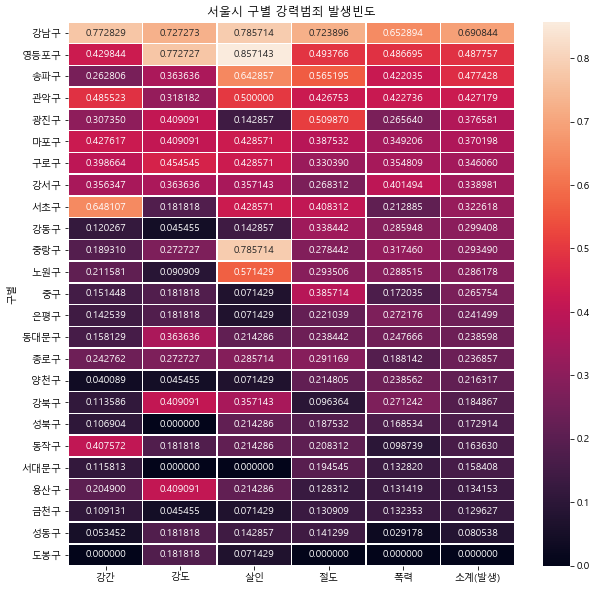

In [57]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='소계(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 강력범죄 발생빈도')
plt.show()

In [58]:
target_col = ['강간', '강도', '살인', '절도', '폭력','소계(발생)']
df_temp = df_by_gu[target_col].div(df_by_gu['인구수'],axis=0)
max_column = df_temp.max() # vector
min_column = df_temp.min()
crime_count_norm = (df_temp - min_column)/max_column
crime_count_norm.head()

,강간,강도,살인,절도,폭력,소계(발생)
구별,,,,,,
강남구,0.408703,0.379011,0.447146,0.190242,0.190517,0.197138
강동구,0.070891,0.034279,0.072740,0.110570,0.099285,0.102406
강북구,0.164681,0.464875,0.408522,0.067411,0.224170,0.140665
강서구,0.150958,0.166430,0.157865,0.026851,0.070914,0.049731
관악구,0.279107,0.179232,0.301515,0.111013,0.122276,0.120718


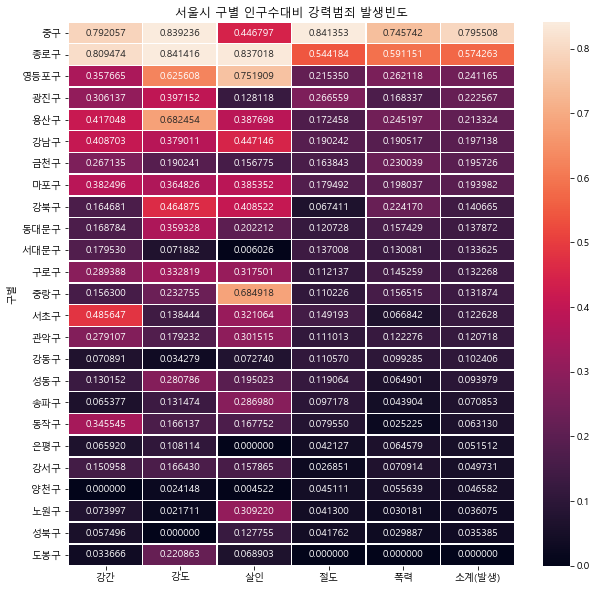

In [59]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='소계(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 인구수대비 강력범죄 발생빈도')
plt.show()

In [ ]:
#지도데이터 -> json 파일

In [64]:
import json
import folium
import warnings

In [67]:
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [82]:
geo_path = 'C:/youngyoo/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [83]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = df_by_gu['살인'],
               columns = [df_by_gu.index, df_by_gu['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map